In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime

In [3]:
df = pd.read_csv('Shopify_train.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2017,43.279999,43.459999,42.134998,42.820000,42.820000,705400
1,1/4/2017,43.259998,44.419998,42.849998,44.139999,44.139999,848100
2,1/5/2017,44.470001,47.939999,44.250000,47.680000,47.680000,5070200
3,1/6/2017,47.360001,47.650002,45.700001,46.900002,46.900002,2061300
4,1/9/2017,47.110001,47.540001,46.700001,47.180000,47.180000,921100


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

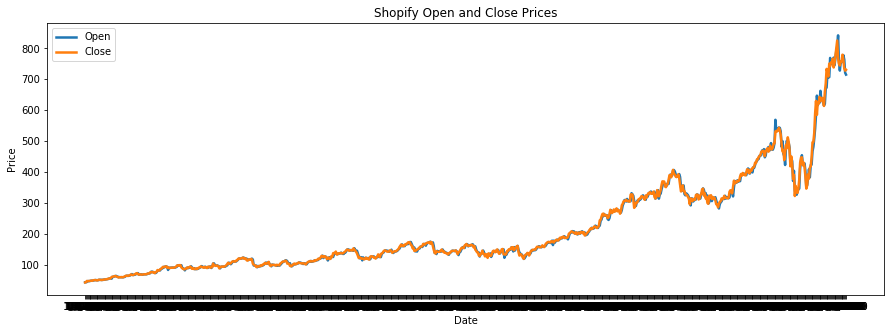

In [7]:
plt.figure(figsize=(15, 5))

plt.plot(df['Date'], df['Open'], label = "Open", linewidth = 2.5)
plt.plot(df['Date'], df['Close'], label = "Close", linewidth = 2.5)

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('Shopify Open and Close Prices')
plt.legend()
plt.show()

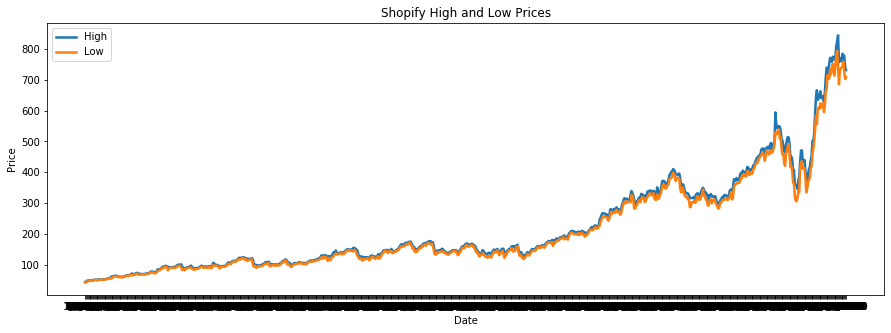

In [8]:
plt.figure(figsize=(15, 5))

plt.plot(df['Date'], df['High'], label = "High", linewidth = 2.5)
plt.plot(df['Date'], df['Low'], label = "Low", linewidth = 2.5)

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('Shopify High and Low Prices')
plt.legend()
plt.show()

In [9]:
df['OpenCloseDifference'] = df['Open'] - df['Close']

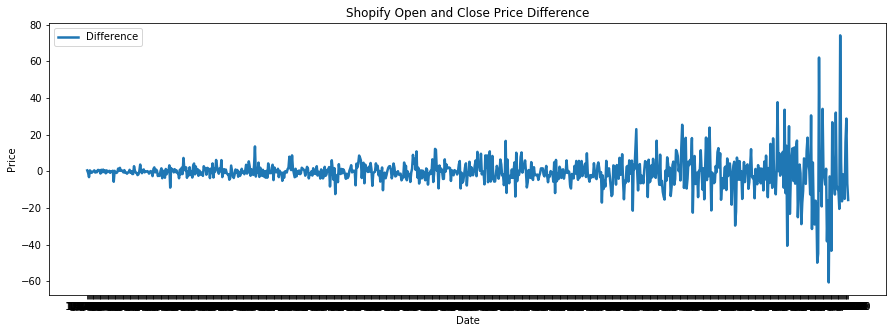

In [10]:
plt.figure(figsize=(15, 5))

plt.plot(df['Date'], df['OpenCloseDifference'], label = "Difference", linewidth = 2.5)

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('Shopify Open and Close Price Difference')
plt.legend()
plt.show()

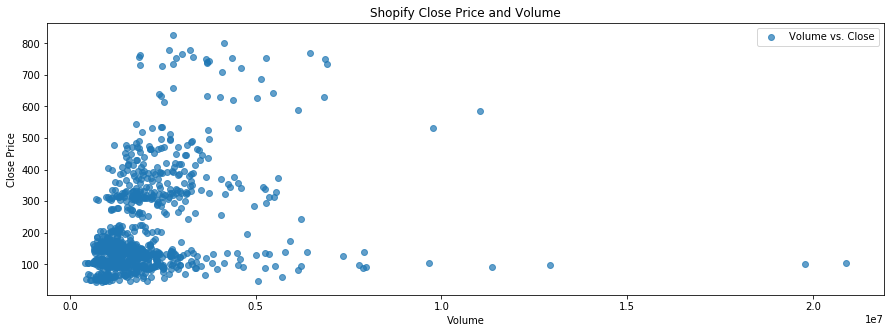

In [11]:
plt.figure(figsize=(15, 5))

plt.scatter(df['Volume'], df['Close'], alpha=0.7, label = 'Volume vs. Close')

plt.xlabel('Volume')
plt.ylabel('Close Price')

plt.title('Shopify Close Price and Volume')
plt.legend()
plt.show()

In [12]:
df_open = df[['Date', 'Open']]
df_close = df[['Date', 'Close']]
df_adjclose = df[['Date', 'Adj Close']]

In [13]:
df_open = df_open.set_index('Date')
df_close = df_close.set_index('Date')
df_adjclose = df_adjclose.set_index('Date')

In [14]:
df_open['Rolling Mean 7'] = df_open['Open'].rolling(window = 7).mean()
df_close['Rolling Mean 7'] = df_close['Close'].rolling(window = 7).mean()
df_adjclose['Rolling Mean 7'] = df_adjclose['Adj Close'].rolling(window = 7).mean()
df_open['Rolling Mean 30'] = df_open['Open'].rolling(window = 30).mean()
df_close['Rolling Mean 30'] = df_close['Close'].rolling(window = 30).mean()
df_adjclose['Rolling Mean 30'] = df_adjclose['Adj Close'].rolling(window = 30).mean()

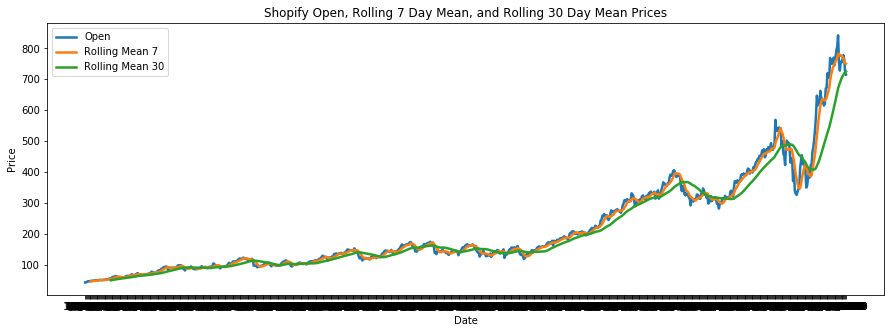

In [15]:
plt.figure(figsize=(15, 5))

plt.plot(df['Date'], df_open['Open'], label = "Open", linewidth = 2.5)
plt.plot(df['Date'], df_open['Rolling Mean 7'], label = "Rolling Mean 7", linewidth = 2.5)
plt.plot(df['Date'], df_open['Rolling Mean 30'], label = "Rolling Mean 30", linewidth = 2.5)

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('Shopify Open, Rolling 7 Day Mean, and Rolling 30 Day Mean Prices')
plt.legend()
plt.show()

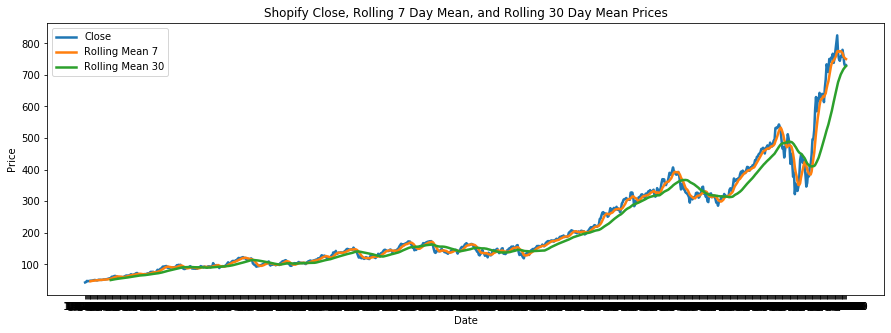

In [16]:
plt.figure(figsize=(15, 5))

plt.plot(df['Date'], df_close['Close'], label = "Close", linewidth = 2.5)
plt.plot(df['Date'], df_close['Rolling Mean 7'], label = "Rolling Mean 7", linewidth = 2.5)
plt.plot(df['Date'], df_close['Rolling Mean 30'], label = "Rolling Mean 30", linewidth = 2.5)

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('Shopify Close, Rolling 7 Day Mean, and Rolling 30 Day Mean Prices')
plt.legend()
plt.show()

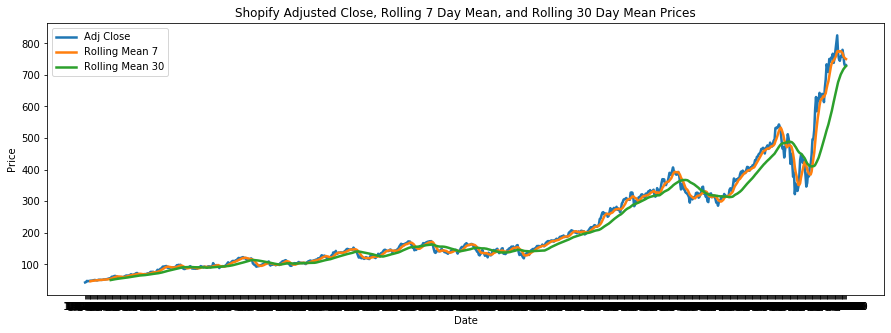

In [17]:
plt.figure(figsize=(15, 5))

plt.plot(df['Date'], df_adjclose['Adj Close'], label = "Adj Close", linewidth = 2.5)
plt.plot(df['Date'], df_adjclose['Rolling Mean 7'], label = "Rolling Mean 7", linewidth = 2.5)
plt.plot(df['Date'], df_adjclose['Rolling Mean 30'], label = "Rolling Mean 30", linewidth = 2.5)

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('Shopify Adjusted Close, Rolling 7 Day Mean, and Rolling 30 Day Mean Prices')
plt.legend()
plt.show()

In [18]:
open_train = df_open['Open']
open_train = pd.DataFrame(open_train)
close_train = df_close['Close']
close_train = pd.DataFrame(open_train)
adjclose_train = df_adjclose['Adj Close']
adjclose_train = pd.DataFrame(open_train)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler(feature_range = (0, 1))
open_train_scaled = scaler.fit_transform(open_train)
close_train_scaled = scaler.fit_transform(close_train)
adjclose_train_scaled = scaler.fit_transform(adjclose_train)

In [21]:
open_X_train = []
open_y_train = []
for i in range(60, 863):
    open_X_train.append(open_train_scaled[i-60:i, 0])
    open_y_train.append(open_train_scaled[i, 0])
open_X_train, open_y_train = np.array(open_X_train), np.array(open_y_train)

open_X_train = np.reshape(open_X_train, (open_X_train.shape[0], open_X_train.shape[1], 1))

In [22]:
close_X_train = []
close_y_train = []
for i in range(60, 863):
    close_X_train.append(close_train_scaled[i-60:i, 0])
    close_y_train.append(close_train_scaled[i, 0])
close_X_train, close_y_train = np.array(close_X_train), np.array(close_y_train)

close_X_train = np.reshape(close_X_train, (close_X_train.shape[0], close_X_train.shape[1], 1))

In [23]:
adjclose_X_train = []
adjclose_y_train = []
for i in range(60, 863):
    adjclose_X_train.append(adjclose_train_scaled[i-60:i, 0])
    adjclose_y_train.append(adjclose_train_scaled[i, 0])
adjclose_X_train, adjclose_y_train = np.array(adjclose_X_train), np.array(adjclose_y_train)

adjclose_X_train = np.reshape(adjclose_X_train, (adjclose_X_train.shape[0], adjclose_X_train.shape[1], 1))

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
open_regressor = Sequential()

open_regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (open_X_train.shape[1], 1)))
open_regressor.add(Dropout(0.2))
open_regressor.add(LSTM(units = 50, return_sequences = True))
open_regressor.add(Dropout(0.2))
open_regressor.add(LSTM(units = 50, return_sequences = True))
open_regressor.add(Dropout(0.2))
open_regressor.add(LSTM(units = 50))
open_regressor.add(Dropout(0.2))

open_regressor.add(Dense(units = 1))

open_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

open_regressor.fit(open_X_train, open_y_train, epochs = 100, batch_size = 30)

Epoch 1/100
27/27 [==============================] - 3s 97ms/step - loss: 0.0139
Epoch 2/100
27/27 [==============================] - 2s 88ms/step - loss: 0.0046
Epoch 3/100
27/27 [==============================] - 2s 89ms/step - loss: 0.0041
Epoch 4/100
27/27 [==============================] - 3s 97ms/step - loss: 0.0037
Epoch 5/100
27/27 [==============================] - 3s 100ms/step - loss: 0.0035
Epoch 6/100
27/27 [==============================] - 2s 92ms/step - loss: 0.0031
Epoch 7/100
27/27 [==============================] - 2s 87ms/step - loss: 0.0029
Epoch 8/100
27/27 [==============================] - 2s 91ms/step - loss: 0.0026
Epoch 9/100
27/27 [==============================] - 2s 87ms/step - loss: 0.0027
Epoch 10/100
27/27 [==============================] - 3s 96ms/step - loss: 0.0029
Epoch 11/100
27/27 [==============================] - 3s 100ms/step - loss: 0.0022
Epoch 12/100
27/27 [==============================] - 2s 92ms/step - loss: 0.0019
Epoch 13/100
27/27 [===

In [26]:
close_regressor = Sequential()

close_regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (close_X_train.shape[1], 1)))
close_regressor.add(Dropout(0.2))
close_regressor.add(LSTM(units = 50, return_sequences = True))
close_regressor.add(Dropout(0.2))
close_regressor.add(LSTM(units = 50, return_sequences = True))
close_regressor.add(Dropout(0.2))
close_regressor.add(LSTM(units = 50))
close_regressor.add(Dropout(0.2))

close_regressor.add(Dense(units = 1))

close_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

close_regressor.fit(close_X_train, close_y_train, epochs = 100, batch_size = 30)

Epoch 1/100
27/27 [==============================] - 3s 94ms/step - loss: 0.0120
Epoch 2/100
27/27 [==============================] - 2s 92ms/step - loss: 0.0047
Epoch 3/100
27/27 [==============================] - 3s 94ms/step - loss: 0.0042
Epoch 4/100
27/27 [==============================] - 3s 96ms/step - loss: 0.0041
Epoch 5/100
27/27 [==============================] - 3s 95ms/step - loss: 0.0028
Epoch 6/100
27/27 [==============================] - 3s 98ms/step - loss: 0.0028
Epoch 7/100
27/27 [==============================] - 3s 103ms/step - loss: 0.0023
Epoch 8/100
27/27 [==============================] - 3s 97ms/step - loss: 0.0021
Epoch 9/100
27/27 [==============================] - 2s 93ms/step - loss: 0.0019
Epoch 10/100
27/27 [==============================] - 2s 92ms/step - loss: 0.0023
Epoch 11/100
27/27 [==============================] - 3s 93ms/step - loss: 0.0025
Epoch 12/100
27/27 [==============================] - 3s 105ms/step - loss: 0.0023
Epoch 13/100
27/27 [===

In [27]:
adjclose_regressor = Sequential()

adjclose_regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (adjclose_X_train.shape[1], 1)))
adjclose_regressor.add(Dropout(0.2))
adjclose_regressor.add(LSTM(units = 50, return_sequences = True))
adjclose_regressor.add(Dropout(0.2))
adjclose_regressor.add(LSTM(units = 50, return_sequences = True))
adjclose_regressor.add(Dropout(0.2))
adjclose_regressor.add(LSTM(units = 50))
adjclose_regressor.add(Dropout(0.2))

adjclose_regressor.add(Dense(units = 1))

adjclose_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

adjclose_regressor.fit(adjclose_X_train, adjclose_y_train, epochs = 100, batch_size = 30)

Epoch 1/100
27/27 [==============================] - 2s 89ms/step - loss: 0.0200
Epoch 2/100
27/27 [==============================] - 3s 93ms/step - loss: 0.0039
Epoch 3/100
27/27 [==============================] - 3s 118ms/step - loss: 0.0036
Epoch 4/100
27/27 [==============================] - 3s 104ms/step - loss: 0.0034
Epoch 5/100
27/27 [==============================] - 3s 98ms/step - loss: 0.0033
Epoch 6/100
27/27 [==============================] - 3s 95ms/step - loss: 0.0040
Epoch 7/100
27/27 [==============================] - 2s 86ms/step - loss: 0.0027
Epoch 8/100
27/27 [==============================] - 3s 116ms/step - loss: 0.0035
Epoch 9/100
27/27 [==============================] - 3s 105ms/step - loss: 0.0031
Epoch 10/100
27/27 [==============================] - 3s 100ms/step - loss: 0.0023
Epoch 11/100
27/27 [==============================] - 2s 83ms/step - loss: 0.0020
Epoch 12/100
27/27 [==============================] - 2s 80ms/step - loss: 0.0020
Epoch 13/100
27/27 [

In [28]:
df_test = pd.read_csv('Shopify_test.csv', index_col="Date")

In [29]:
df_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
6/9/2020,743.909973,754.799988,733.25000,741.700012,741.700012,1517000
6/10/2020,757.000000,758.500000,732.51001,743.640015,743.640015,1492100
6/11/2020,733.340027,765.520020,724.00000,725.119995,725.119995,2288000
6/12/2020,739.340027,745.000000,713.22998,742.580017,742.580017,2122000
6/15/2020,777.000000,807.390015,769.86499,805.469971,805.469971,4060700


In [30]:
open_test = df_test['Open']
open_test = pd.DataFrame(open_test)
close_test = df_test['Close']
close_test = pd.DataFrame(close_test)
adjclose_test = df_test['Adj Close']
adjclose_test = pd.DataFrame(adjclose_test)

In [31]:
df_total = pd.concat((df_open['Open'], df_test['Open']), axis = 0)
open_inputs = df_total[len(df_total) - len(df_test) - 60:].values
open_inputs = open_inputs.reshape(-1, 1)
open_inputs = scaler.transform(open_inputs)

open_X_test = []
for i in range(60, 90):
    open_X_test.append(open_inputs[i-60:i, 0])
open_X_test = np.array(open_X_test)
open_X_test = np.reshape(open_X_test, (open_X_test.shape[0], open_X_test.shape[1], 1))
predicted_open_price = open_regressor.predict(open_X_test)
predicted_open_price = scaler.inverse_transform(predicted_open_price)

open_test['PredictedOpen'] = predicted_open_price

In [40]:
df_total = pd.concat((df_close['Close'], df_test['Close']), axis = 0)
close_inputs = df_total[len(df_total) - len(df_test) - 60:].values
close_inputs = close_inputs.reshape(-1, 1)
close_inputs = scaler.transform(close_inputs)

close_X_test = []
for i in range(60, 90):
    close_X_test.append(close_inputs[i-60:i, 0])
close_X_test = np.array(close_X_test)
close_X_test = np.reshape(close_X_test, (close_X_test.shape[0], close_X_test.shape[1], 1))
predicted_close_price = close_regressor.predict(close_X_test)
predicted_close_price = scaler.inverse_transform(predicted_close_price)

close_test['PredictedClose'] = predicted_close_price

In [41]:
df_total = pd.concat((df_adjclose['Adj Close'], df_test['Adj Close']), axis = 0)
adjclose_inputs = df_total[len(df_total) - len(df_test) - 60:].values
adjclose_inputs = adjclose_inputs.reshape(-1, 1)
adjclose_inputs = scaler.transform(adjclose_inputs)

adjclose_X_test = []
for i in range(60, 90):
    adjclose_X_test.append(adjclose_inputs[i-60:i, 0])
adjclose_X_test = np.array(adjclose_X_test)
adjclose_X_test = np.reshape(adjclose_X_test, (adjclose_X_test.shape[0], adjclose_X_test.shape[1], 1))
predicted_adjclose_price = adjclose_regressor.predict(adjclose_X_test)
predicted_adjclose_price = scaler.inverse_transform(predicted_adjclose_price)

adjclose_test['PredictedAdjClose'] = predicted_adjclose_price

In [42]:
import sklearn.metrics as sklm

In [43]:
RMSE_Open = math.sqrt(sklm.mean_squared_error(open_test['Open'], open_test['PredictedOpen']))
RMSE_Close = math.sqrt(sklm.mean_squared_error(close_test['Close'], close_test['PredictedClose']))
RMSE_AdjClose = math.sqrt(sklm.mean_squared_error(adjclose_test['Adj Close'], adjclose_test['PredictedAdjClose']))

print(f"RMSE of Open Predictions: {RMSE_Open}")
print(f"RMSE of Close Predictions: {RMSE_Close}")
print(f"RMSE of Adj Close Predictions: {RMSE_AdjClose}")

RMSE of Open Predictions: 78.09977963399301
RMSE of Close Predictions: 81.08821042225838
RMSE of Adj Close Predictions: 86.71228186645442


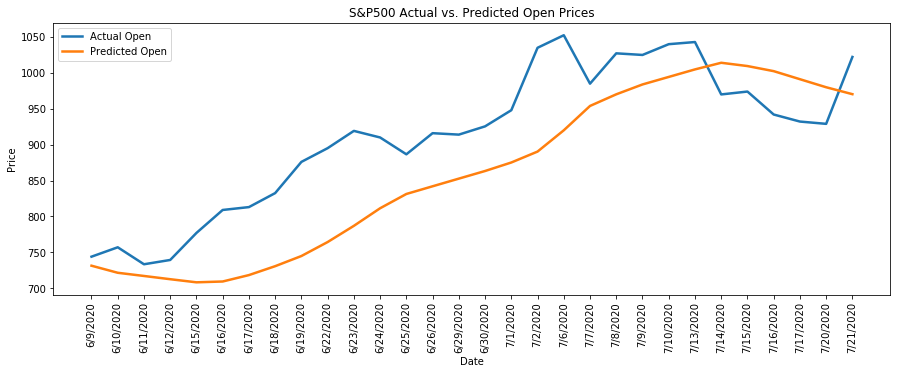

In [51]:
plt.figure(figsize=(15, 5))

plt.plot(open_test.index.values, open_test['Open'], label = "Actual Open", linewidth = 2.5)
plt.plot(open_test.index.values, open_test['PredictedOpen'], label = "Predicted Open", linewidth = 2.5)
plt.xticks(open_test.index.values, rotation='vertical')

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('Shopify Actual vs. Predicted Open Prices')
plt.legend()
plt.show()

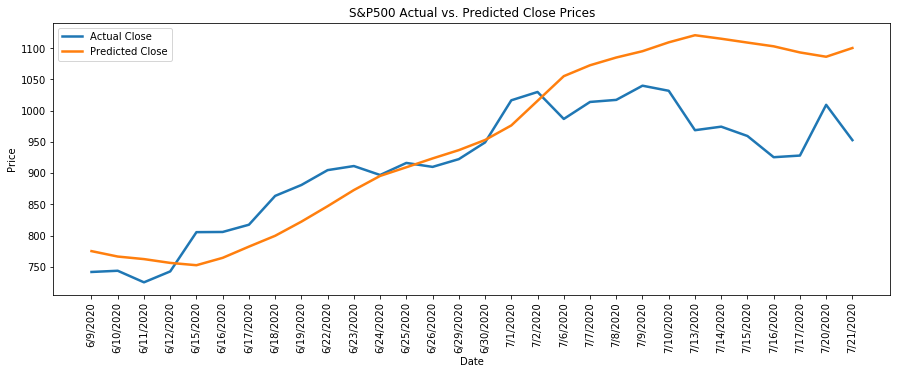

In [52]:
plt.figure(figsize=(15, 5))

plt.plot(close_test.index.values, close_test['Close'], label = "Actual Close", linewidth = 2.5)
plt.plot(close_test.index.values, close_test['PredictedClose'], label = "Predicted Close", linewidth = 2.5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(close_test.index.values, rotation='vertical')

plt.title('Shopify Actual vs. Predicted Close Prices')
plt.legend()
plt.show()

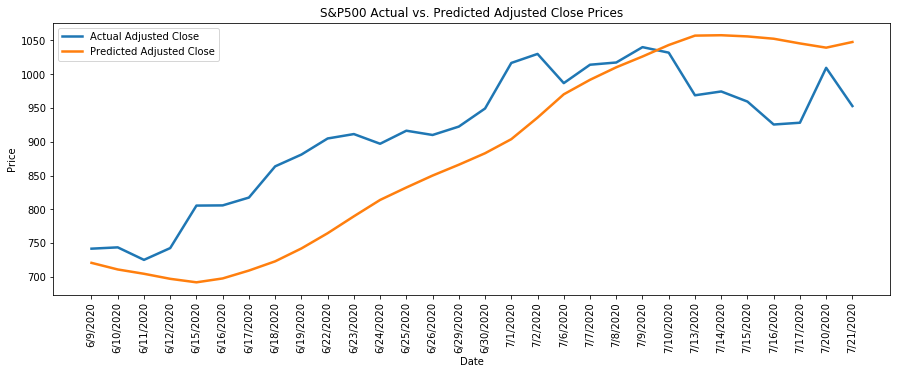

In [50]:
plt.figure(figsize=(15, 5))

plt.plot(adjclose_test.index.values, adjclose_test['Adj Close'], label = "Actual Adjusted Close", linewidth = 2.5)
plt.plot(adjclose_test.index.values, adjclose_test['PredictedAdjClose'], label = "Predicted Adjusted Close", linewidth = 2.5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(adjclose_test.index.values, rotation='vertical')

plt.title('Shopify Actual vs. Predicted Adjusted Close Prices')
plt.legend()
plt.show()

In [248]:
open_forecast = pd.DataFrame(columns=['Open'])
close_forecast = pd.DataFrame(columns=['Close'])
adjclose_forecast = pd.DataFrame(columns=['Adj Close'])

In [249]:
for i in range(1, 61):
    df_total = pd.concat((df_open['Open'], df_test['Open'], open_forecast['Open']), axis = 0)
    open_inputs = df_total[len(df_total) - len(open_forecast) - 61 + i:].values
    open_inputs = open_inputs.reshape(-1, 1)
    open_inputs = scaler.transform(open_inputs)

    open_X_forecast = []
    for j in range(60, 61):
        open_X_forecast.append(open_inputs[j-60:j, 0])
    open_X_forecast = np.array(open_X_forecast)
    open_X_forecast = np.reshape(open_X_forecast, (open_X_forecast.shape[0], open_X_forecast.shape[1], 1))

    predicted_open_forecast = open_regressor.predict(open_X_forecast)
    predicted_open_forecast = scaler.inverse_transform(predicted_open_forecast)
    open_forecast = open_forecast.append({'Open':predicted_open_forecast[0][0]}, ignore_index = True)

In [250]:
for i in range(1, 61):
    df_total = pd.concat((df_close['Close'], df_test['Close'], close_forecast['Close']), axis = 0)
    close_inputs = df_total[len(df_total) - len(close_forecast) - 61 + i:].values
    close_inputs = close_inputs.reshape(-1, 1)
    close_inputs = scaler.transform(close_inputs)

    close_X_forecast = []
    for j in range(60, 61):
        close_X_forecast.append(close_inputs[j-60:j, 0])
    close_X_forecast = np.array(close_X_forecast)
    close_X_forecast = np.reshape(close_X_forecast, (close_X_forecast.shape[0], close_X_forecast.shape[1], 1))

    predicted_close_forecast = close_regressor.predict(close_X_forecast)
    predicted_close_forecast = scaler.inverse_transform(predicted_close_forecast)
    close_forecast = close_forecast.append({'Close':predicted_close_forecast[0][0]}, ignore_index = True)

In [251]:
for i in range(1, 61):
    df_total = pd.concat((df_adjclose['Adj Close'], df_test['Adj Close'], adjclose_forecast['Adj Close']), axis = 0)
    adjclose_inputs = df_total[len(df_total) - len(adjclose_forecast) - 61 + i:].values
    adjclose_inputs = adjclose_inputs.reshape(-1, 1)
    adjclose_inputs = scaler.transform(adjclose_inputs)

    adjclose_X_forecast = []
    for j in range(60, 61):
        adjclose_X_forecast.append(adjclose_inputs[j-60:j, 0])
    adjclose_X_forecast = np.array(adjclose_X_forecast)
    adjclose_X_forecast = np.reshape(adjclose_X_forecast, (adjclose_X_forecast.shape[0], adjclose_X_forecast.shape[1], 1))

    predicted_adjclose_forecast = adjclose_regressor.predict(adjclose_X_forecast)
    predicted_adjclose_forecast = scaler.inverse_transform(predicted_adjclose_forecast)
    adjclose_forecast = adjclose_forecast.append({'Adj Close':predicted_adjclose_forecast[0][0]}, ignore_index = True)

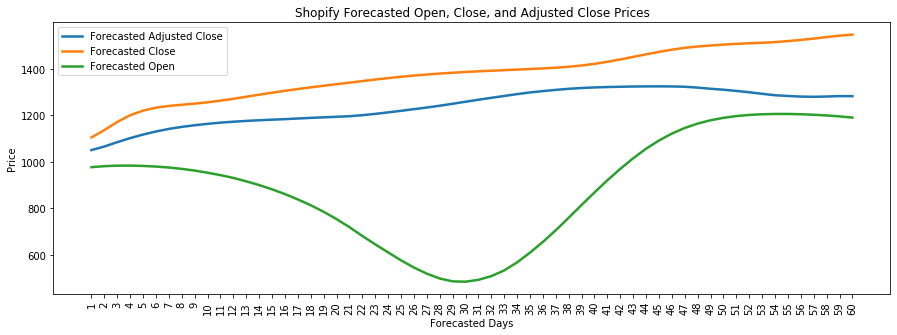

In [252]:
plt.figure(figsize=(15, 5))

plt.plot(adjclose_forecast.index.values + 1, adjclose_forecast['Adj Close'], label = "Forecasted Adjusted Close", linewidth = 2.5)
plt.plot(close_forecast.index.values + 1, close_forecast['Close'], label = "Forecasted Close", linewidth = 2.5)
plt.plot(open_forecast.index.values + 1, open_forecast['Open'], label = "Forecasted Open", linewidth = 2.5)

plt.xlabel('Forecasted Days')
plt.ylabel('Price')
plt.xticks(adjclose_forecast.index.values + 1, rotation='vertical')

plt.title('Shopify Forecasted Open, Close, and Adjusted Close Prices')
plt.legend()
plt.show()